<a href="https://colab.research.google.com/github/FathimaNazarudeen/lung-cancer/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [73]:
data=pd.read_csv("/content/thirddatasetdata3lung1editednew.csv")

In [74]:
data['Label'].value_counts()

'squamous cell carcinoma'    83
'large cell'                 71
others                       70
adenocarcinoma               23
Name: Label, dtype: int64

In [75]:
data.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength', 'Label'],
      dtype='object', length=1094)

In [76]:
data_real = data.replace(np.inf, np.nan)

In [77]:
data_real.isnull().sum().sum()

0

In [78]:
data_df = data_real.dropna(axis=0)

In [79]:
data_df.isnull().sum().sum()

0

In [80]:
data_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,Label
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136,'large cell'
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920,'large cell'
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655,'large cell'
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226,'large cell'
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624,'large cell'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902,others
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423,others
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316,others
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061,others


In [81]:
data_X = data_df.drop(['Label'], axis = 1)

In [82]:
data_X.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength'],
      dtype='object', length=1093)

In [83]:
data_X.shape 

(247, 1093)

In [84]:
data_y = data_df['Label']

In [85]:
data_y.shape 

(247,)

In [86]:
data_df.isnull().sum().sum()

0

In [87]:
data_y.unique()

array(["'large cell'", "'squamous cell carcinoma'", 'adenocarcinoma',
       'others'], dtype=object)

In [88]:
data_X 

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


Label encoding

In [89]:
from sklearn.preprocessing import LabelEncoder 

In [90]:
le = LabelEncoder()

In [91]:
data_y_trans = le.fit_transform(data_y)


In [92]:
data_X

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


In [93]:
df2 = pd.DataFrame(data_X)  

In [94]:
df2.to_csv(r'my_data.csv', index=False)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, train_size = 0.7)

In [96]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

FEATURE SELECTION

In [97]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

In [98]:
model = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, 
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [99]:
model.feature_importances_

array([0.00095195, 0.00139088, 0.0009904 , ..., 0.00042896, 0.00129838,
       0.00105998])

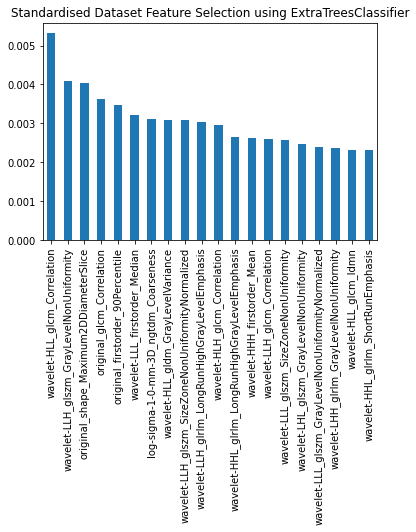

In [100]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [101]:
feature_importance_std.nlargest(20)

wavelet-HLL_glcm_Correlation                          0.005322
wavelet-LLH_glszm_GrayLevelNonUniformity              0.004076
original_shape_Maximum2DDiameterSlice                 0.004027
original_glcm_Correlation                             0.003631
original_firstorder_90Percentile                      0.003473
wavelet-LLL_firstorder_Median                         0.003212
log-sigma-1-0-mm-3D_ngtdm_Coarseness                  0.003106
wavelet-HLL_gldm_GrayLevelVariance                    0.003091
wavelet-LLH_glszm_SizeZoneNonUniformityNormalized     0.003088
wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis        0.003032
wavelet-HLH_glcm_Correlation                          0.002955
wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis        0.002646
wavelet-HHH_firstorder_Mean                           0.002623
wavelet-LLH_glcm_Correlation                          0.002597
wavelet-LLL_glszm_SizeZoneNonUniformity               0.002580
wavelet-LHL_glszm_GrayLevelNonUniformity              0

In [102]:
data_new_20features_X = data_X[['wavelet-HLL_glcm_Correlation',
'wavelet-LLH_glszm_GrayLevelNonUniformity',
'original_shape_Maximum2DDiameterSlice',
'original_glcm_Correlation',
'original_firstorder_90Percentile',
'wavelet-LLL_firstorder_Median',
'log-sigma-1-0-mm-3D_ngtdm_Coarseness',
'wavelet-HLL_gldm_GrayLevelVariance',
'wavelet-LLH_glszm_SizeZoneNonUniformityNormalized',
'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis',
'wavelet-HLH_glcm_Correlation',
'wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis',
'wavelet-HHH_firstorder_Mean',
'wavelet-LLH_glcm_Correlation',
'wavelet-LLL_glszm_SizeZoneNonUniformity',
'wavelet-LLH_glszm_GrayLevelNonUniformity',
'wavelet-LLL_glszm_GrayLevelNonUniformityNormalized',
'wavelet-LHH_glrlm_GrayLevelNonUniformity',
'wavelet-HHL_glrlm_ShortRunEmphasis']]

In [103]:
data_new_20features_X

,wavelet-HLL_glcm_Correlation,wavelet-LLH_glszm_GrayLevelNonUniformity,original_shape_Maximum2DDiameterSlice,original_glcm_Correlation,original_firstorder_90Percentile,wavelet-LLL_firstorder_Median,log-sigma-1-0-mm-3D_ngtdm_Coarseness,wavelet-HLL_gldm_GrayLevelVariance,wavelet-LLH_glszm_SizeZoneNonUniformityNormalized,wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis,wavelet-HLH_glcm_Correlation,wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis,wavelet-HHH_firstorder_Mean,wavelet-LLH_glcm_Correlation,wavelet-LLL_glszm_SizeZoneNonUniformity,wavelet-LLH_glszm_GrayLevelNonUniformity,wavelet-LLL_glszm_GrayLevelNonUniformityNormalized,wavelet-LHH_glrlm_GrayLevelNonUniformity,wavelet-HHL_glrlm_ShortRunEmphasis
0,0.111907,59.266235,61.188234,0.692753,320.109735,152.173401,0.001385,587.024260,0.629069,15233.713280,0.004805,12449.762880,-0.034250,0.338160,3856.633300,59.266235,0.004577,266.960698,0.969541
1,0.186510,35.799083,48.332184,0.874721,35.692534,-277.363739,0.003359,1678.095013,0.577221,11886.039060,-0.011177,9211.393271,0.003666,0.378823,1482.287701,35.799083,0.003834,132.744918,0.981721
2,0.228052,52.330247,50.000000,0.543484,103.570842,205.087456,0.001291,307.093149,0.546732,8416.489819,0.066790,4872.943326,-0.074055,0.442844,2393.474352,52.330247,0.007771,420.984012,0.959236
3,0.182696,36.963134,50.159745,0.471547,58.279659,21.103539,0.003327,201.963445,0.474790,8534.187501,0.025917,6329.094091,-0.003756,0.380519,866.476580,36.963134,0.013083,112.082673,0.980580
4,0.172725,61.275099,59.363288,0.571065,64.912999,11.502838,0.001198,1038.807072,0.616722,15271.408360,0.043009,15586.556710,0.126153,0.357940,3596.487221,61.275099,0.006591,244.401105,0.984527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.222189,377.034868,118.962179,0.484215,74.714656,104.797287,0.000202,201.674443,0.436838,9361.071817,0.044446,13232.335790,-0.033676,0.376870,11190.092250,377.034868,0.012663,3134.211362,0.955379
243,0.242403,19.990148,34.234486,0.458299,102.990390,174.314224,0.003836,90.356696,0.492993,11013.892660,0.086067,3492.605707,-0.139018,0.477427,744.748533,19.990148,0.012673,96.713506,0.970960
244,0.400221,4.717172,16.124516,0.540853,102.380483,55.334547,0.030720,173.772280,0.469034,236.962555,-0.014947,975.782516,-0.268201,0.485060,133.329268,4.717172,0.012344,20.446238,0.963744
245,0.371026,16.793765,29.120440,0.532447,124.962648,189.995987,0.006959,100.458654,0.437020,3324.496749,0.087089,3114.071937,-0.501685,0.460377,510.316422,16.793765,0.011781,91.414642,0.958340


In [104]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.8, random_state=26)

In [105]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=56)
rf.fit(data_new_20features_X, data_y_trans)

RandomForestClassifier(random_state=56)

In [107]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [108]:
print(conf_mat)

[[60  7  0  4]
 [ 1 79  0  3]
 [ 1  0 20  2]
 [ 5  0  0 65]]


In [109]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87        71
           1       0.92      0.95      0.93        83
           2       1.00      0.87      0.93        23
           3       0.88      0.93      0.90        70

    accuracy                           0.91       247
   macro avg       0.92      0.90      0.91       247
weighted avg       0.91      0.91      0.91       247



In [110]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [111]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(data_y_trans, classes=[0, 1, 2,3])
from itertools import cycle
lw=2

In [112]:
import matplotlib.pyplot as plt

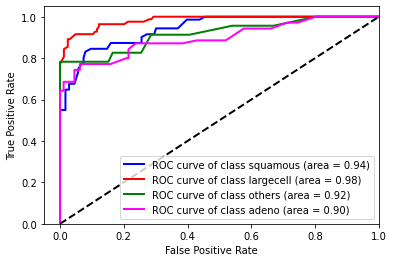

In [113]:
y_score = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=2 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

**Using DEAP**

In [114]:
data_new_20features_Xt = ss_20.fit_transform(data_new_20features_X)

In [115]:
pip install sklearn-deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': np.logspace(1,1.8,num = 10 ,base=20,dtype='int'),
    'max_depth': np.logspace(1,2,num = 10 ,base=10,dtype='int'),
    "max_features":np.logspace(0.2,1,num = 5 ,base=8,dtype='int'),
    "min_samples_split":np.logspace(0.4, 1, num=5, base=10, dtype='int'), #[2, 3, 5, 7, 10],
    "min_samples_leaf":np.logspace(0.1,1,num = 5 ,base=11,dtype='int'),
    "criterion":['gini','entropy']
}
rf_params = {
    'n_estimators': range(10,100),
    "max_features":range(1,64),
    'max_depth': range(5,50),
    "min_samples_split":range(2,11),
    "min_samples_leaf":range(1,11),
    #Categorical(name='criterion', categories=['gini','entropy'])#
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=56)
# Set the hyperparameters of GA 
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=10,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(data_X, data_y_trans)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [1, 1, 1, 1, 1, 1] and maxint [89, 62, 44, 8, 9, 1] detected
--- Evolve in 45927000 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	10    	0.846559	0.753036	0.902834	0.052302
1  	5     	0.878138	0.842105	0.902834	0.0222082
2  	6     	0.892308	0.846154	0.902834	0.0159084
3  	6     	0.903644	0.898785	0.919028	0.00566802
4  	4     	0.903239	0.890688	0.919028	0.00711676
5  	8     	0.897976	0.817814	0.919028	0.028559  
Best individual is: {'n_estimators': 18, 'max_features': 57, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
with fitness: 0.9190283400809717
{'n_estimators': 18, 'max_features': 57, 'max_depth': 21, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'entropy'}
Accuracy:0.9190283400809717


In [117]:
from sklearn.model_selection import cross_val_score

SVM

In [118]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=4, C=1)

In [119]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=4)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [120]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        71
           1       0.72      0.93      0.81        83
           2       1.00      0.78      0.88        23
           3       1.00      0.79      0.88        70

    accuracy                           0.82       247
   macro avg       0.88      0.81      0.83       247
weighted avg       0.85      0.82      0.82       247



**svm Using DEAP**

In [121]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'C': np.random.uniform(0,50,1000),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=10,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(data_new_20features_Xt, data_y_trans)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

Types [2, 1] and maxint [999, 3] detected
--- Evolve in 4000 possible combinations ---


/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max     	std     
0  	10    	0.635223	0.291498	0.870445	0.227892
1  	6     	0.806883	0.672065	0.870445	0.0618003
2  	8     	0.851012	0.700405	0.870445	0.0507221
3  	1     	0.81417 	0.307692	0.870445	0.168826 
4  	8     	0.862753	0.777328	0.88664 	0.0288815
5  	5     	0.869231	0.801619	0.890688	0.0290287
Best individual is: {'C': 34.26065000842094, 'kernel': 'rbf'}
with fitness: 0.8906882591093117
{'C': 34.26065000842094, 'kernel': 'rbf'}
Accuracy:0.8906882591093117


knn

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) 

In [136]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=4)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [137]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70        71
           1       0.71      0.75      0.73        83
           2       0.75      0.52      0.62        23
           3       0.66      0.63      0.64        70

    accuracy                           0.69       247
   macro avg       0.70      0.66      0.67       247
weighted avg       0.69      0.69      0.69       247



KNN usin Deap

In [138]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
clf = KNeighborsClassifier()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(data_new_20features_Xt, data_y_trans)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [1] and maxint [18] detected
--- Evolve in 19 possible combinations ---
gen	nevals	avg     	min     	max     	std     
0  	10    	0.625101	0.412955	0.846154	0.146279
1  	3     	0.773279	0.591093	0.846154	0.0826744
2  	10    	0.812146	0.732794	0.846154	0.0519482
3  	8     	0.846154	0.846154	0.846154	0        
4  	6     	0.846154	0.846154	0.846154	0        
5  	6     	0.846154	0.846154	0.846154	0        
Best individual is: {'n_neighbors': 1}
with fitness: 0.8461538461538461
{'n_neighbors': 1}
Accuracy:0.8461538461538461


ROC Curve

In [125]:
def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 3
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['adeno','squamous','other']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()

In [126]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-125-3fa2d96845d8>:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


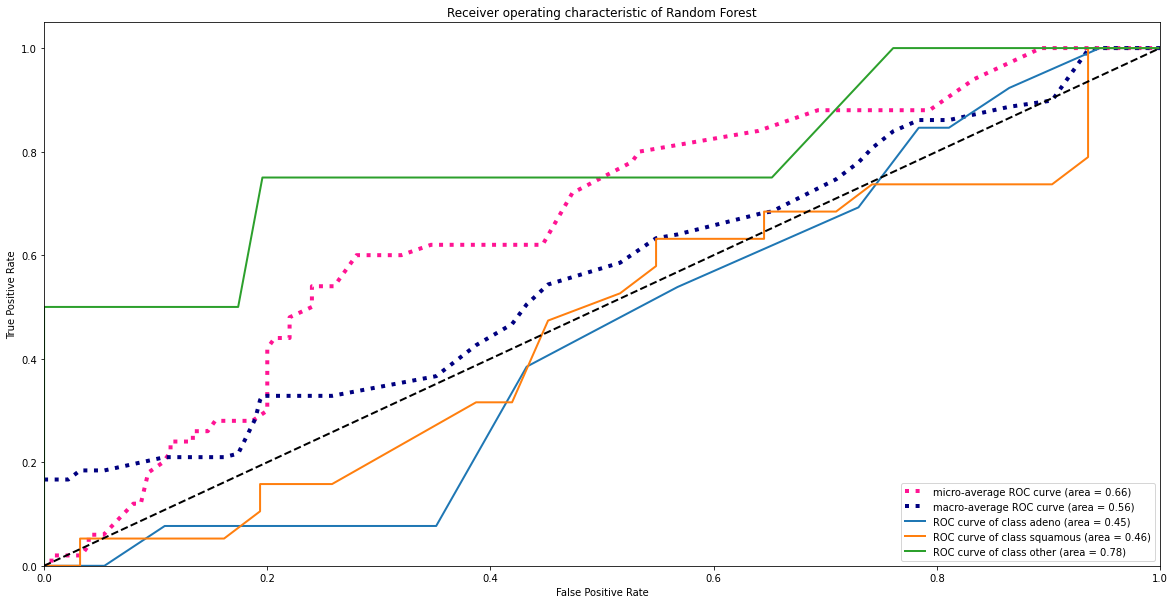

In [127]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

XGBoost

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

In [143]:
gradient_boost = GradientBoostingClassifier(random_state=56)

In [145]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [146]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        71
           1       0.91      0.94      0.92        83
           2       0.83      0.87      0.85        23
           3       0.90      0.91      0.91        70

    accuracy                           0.91       247
   macro avg       0.90      0.90      0.90       247
weighted avg       0.91      0.91      0.91       247



In [150]:
from evolutionary_search import EvolutionaryAlgorithmSearchCV
rf_params = {}
clf = GradientBoostingClassifier()
ga1 = EvolutionaryAlgorithmSearchCV(estimator=clf,
                                   params=rf_params,
                                   scoring="accuracy",
                                   cv=3,
                                   verbose=1,
                                   population_size=10,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   n_jobs=1)
ga1.fit(data_new_20features_Xt,data_y_trans)
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))

/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.8/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Types [] and maxint [] detected
--- Evolve in 1.0 possible combinations ---
gen	nevals	avg   	min   	max   	std
0  	10    	0.8583	0.8583	0.8583	0  
1  	6     	0.8583	0.8583	0.8583	0  
2  	4     	0.8583	0.8583	0.8583	0  
3  	4     	0.8583	0.8583	0.8583	0  
4  	10    	0.8583	0.8583	0.8583	0  
5  	7     	0.8583	0.8583	0.8583	0  
Best individual is: {}
with fitness: 0.8582995951417004
{}
Accuracy:0.8582995951417004


Gradient boostclassifier

In [132]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=0)
gradient_boost.fit(X_train_std_20, y_train_20)

GradientBoostingClassifier(random_state=0)

In [133]:
res_xg=gradient_boost.predict(X_test_std_20)

In [134]:
acc_score_xg = accuracy_score(y_test_20, res_xg)
print("Accuracy Score for GradientBoosting: \n", acc_score_xg*100)

Accuracy Score for GradientBoosting: 
 82.0
